# Investigation of  (tmdb-movies) Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
  we have a dataset (tmdb-movies) contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, the movie revenue and budget. It also have the popularity, the genre and other features of movies. 
# -------------------------------------------------------------------------------------------------------

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

<a id='wrangling'></a>

# Data Wrangling


In [7]:
df=pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### We will drop the columns that won't be needed in our anaysis!

In [9]:
df.drop(['id', 'imdb_id','original_title','homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime','vote_count','cast','release_date','production_companies','budget_adj',
       'revenue_adj'],axis=1,inplace=True)

In [10]:
df.head()

,popularity,budget,revenue,genres,vote_average,release_year
0,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,6.3,2015
3,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,9.335014,190000000,1506249360,Action|Crime|Thriller,7.3,2015


### Here we will handel the Na values and missing data!

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   genres        10843 non-null  object 
 4   vote_average  10866 non-null  float64
 5   release_year  10866 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 509.5+ KB


In [12]:
df.isnull().sum()

popularity       0
budget           0
revenue          0
genres          23
vote_average     0
release_year     0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isnull().sum()

popularity      0
budget          0
revenue         0
genres          0
vote_average    0
release_year    0
dtype: int64

In [14]:
df.query('revenue == 0').revenue.count() ,df.query('budget == 0').budget.count()

(5993, 5674)

In [15]:
df.query('revenue == 0')

,popularity,budget,revenue,genres,vote_average,release_year
48,2.932340,30000000,0,Thriller|Crime|Drama,5.3,2015
67,2.331636,20000000,0,Crime|Thriller|Action,5.4,2015
74,2.165433,0,0,Action|Adventure|Fantasy,5.1,2015
75,2.141506,0,0,Comedy|Drama,7.7,2015
92,1.876037,0,0,Fantasy|Action|Adventure,5.4,2015
...,...,...,...,...,...,...
10861,0.080598,0,0,Documentary,7.4,1966
10862,0.065543,0,0,Action|Adventure|Drama,5.7,1966
10863,0.065141,0,0,Mystery|Comedy,6.5,1966
10864,0.064317,0,0,Action|Comedy,5.4,1966


In [16]:
df.query('vote_average == 0').vote_average.count()

0

In [17]:
df.drop(df.query('revenue == 0').index,axis=0,inplace=True)
df.drop(df.query('revenue == 0').index,axis=0,inplace=True)

In [18]:
df.shape

(4850, 6)

### We dropped Na values' rows as they were few, and the rows having 0 value in both revenue and budget columns as we can't fill them by other rows because they don't have the same properties.

In [19]:
df.dtypes

popularity      float64
budget            int64
revenue           int64
genres           object
vote_average    float64
release_year      int64
dtype: object

## Here we handel the genres column to extact every genre in a separate row!

In [20]:
the_genres=df['genres'].str.split('|',expand=True)
the_genres

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
10822,Drama,None,None,None,None
10828,Mystery,Thriller,None,None,None
10829,Action,Western,None,None,None
10835,Action,Adventure,Drama,War,Romance


In [21]:
df_splitted=pd.concat([df,the_genres],axis=1)

In [22]:
df_splitted

,popularity,budget,revenue,genres,vote_average,release_year,0,1,2,3,4
0,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,6.5,2015,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,7.1,2015,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,6.3,2015,Adventure,Science Fiction,Thriller,None,None
3,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,7.5,2015,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,190000000,1506249360,Action|Crime|Thriller,7.3,2015,Action,Crime,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000,33736689,Drama,7.5,1966,Drama,None,None,None,None
10828,0.402730,3000000,13000000,Mystery|Thriller,6.3,1966,Mystery,Thriller,None,None,None
10829,0.395668,4653000,6000000,Action|Western,6.9,1966,Action,Western,None,None,None
10835,0.299911,12000000,20000000,Action|Adventure|Drama|War|Romance,7.0,1966,Action,Adventure,Drama,War,Romance


In [23]:
df['genres']=df_splitted[0]
df1=df.copy()
for i in range(1,5):
    df1['genres']=df_splitted[i]
    df=pd.concat([df,df1],axis=0)

In [24]:
df

,popularity,budget,revenue,genres,vote_average,release_year
0,32.985763,150000000,1513528810,Action,6.5,2015
1,28.419936,150000000,378436354,Action,7.1,2015
2,13.112507,110000000,295238201,Adventure,6.3,2015
3,11.173104,200000000,2068178225,Action,7.5,2015
4,9.335014,190000000,1506249360,Action,7.3,2015
...,...,...,...,...,...,...
10822,0.670274,7500000,33736689,None,7.5,1966
10828,0.402730,3000000,13000000,None,6.3,1966
10829,0.395668,4653000,6000000,None,6.9,1966
10835,0.299911,12000000,20000000,Romance,7.0,1966


In [25]:
df.genres.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror',
       'Documentary', 'Music', 'TV Movie', None, 'Foreign'], dtype=object)

### Now the genre column is separated but it has rows with None value, we will drop them!

In [26]:
df=df.query("genres in ['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama','Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery','Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music','Documentary', 'TV Movie', 'Foreign']")

In [27]:
(df==None).sum()

popularity      0
budget          0
revenue         0
genres          0
vote_average    0
release_year    0
dtype: int64

In [28]:
df.shape

(12669, 6)

In [29]:
print(df.dtypes)
df

popularity      float64
budget            int64
revenue           int64
genres           object
vote_average    float64
release_year      int64
dtype: object


,popularity,budget,revenue,genres,vote_average,release_year
0,32.985763,150000000,1513528810,Action,6.5,2015
1,28.419936,150000000,378436354,Action,7.1,2015
2,13.112507,110000000,295238201,Adventure,6.3,2015
3,11.173104,200000000,2068178225,Action,7.5,2015
4,9.335014,190000000,1506249360,Action,7.3,2015
...,...,...,...,...,...,...
10656,0.381352,25485000,29548291,War,6.6,1970
10683,0.429246,10000000,1500000,Romance,6.7,1970
10761,1.090065,0,49579269,Family,6.2,1978
10788,0.277769,24000000,21049053,Science Fiction,6.1,1978


### Ok! Our data is clean to explore now....

<a id='eda'></a>
# ---------------------------------------------------------------------------------------------------------
# Exploratory Data Analysis
### Now we will suppose some questions for exploring our data set:
###### 1) which genre has the most trend over years?
###### 2) which genre has the most avarage budget and revenue?
###### 3) what genre has the most poprlarity over years?
###### 4) which movie kind has the most vote rating?
# -----------


In [30]:
df

,popularity,budget,revenue,genres,vote_average,release_year
0,32.985763,150000000,1513528810,Action,6.5,2015
1,28.419936,150000000,378436354,Action,7.1,2015
2,13.112507,110000000,295238201,Adventure,6.3,2015
3,11.173104,200000000,2068178225,Action,7.5,2015
4,9.335014,190000000,1506249360,Action,7.3,2015
...,...,...,...,...,...,...
10656,0.381352,25485000,29548291,War,6.6,1970
10683,0.429246,10000000,1500000,Romance,6.7,1970
10761,1.090065,0,49579269,Family,6.2,1978
10788,0.277769,24000000,21049053,Science Fiction,6.1,1978


In [31]:
df.describe()

,popularity,budget,revenue,vote_average,release_year
count,12669.000000,1.266900e+04,1.266900e+04,12669.000000,12669.000000
mean,1.117011,3.387511e+07,1.009431e+08,6.134478,2000.459468
std,1.489441,4.397130e+07,1.782994e+08,0.788794,11.560362
min,0.001117,0.000000e+00,2.000000e+00,2.100000,1960.000000
25%,0.409695,3.000000e+06,9.500000e+06,5.600000,1993.000000
50%,0.718275,1.900000e+07,3.561010e+07,6.200000,2003.000000
75%,1.278646,4.800000e+07,1.132801e+08,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,8.400000,2015.000000


### The most trend movie type?!!!

In [32]:
df.groupby('genres').count().popularity

genres
Action             1261
Adventure           843
Animation           237
Comedy             1771
Crime               774
Documentary         102
Drama              2275
Family              513
Fantasy             461
Foreign              31
History             153
Horror              561
Music               186
Mystery             410
Romance             877
Science Fiction     587
TV Movie              1
Thriller           1424
War                 137
Western              65
Name: popularity, dtype: int64

In [33]:
df.groupby('genres').count().popularity.max()

2275

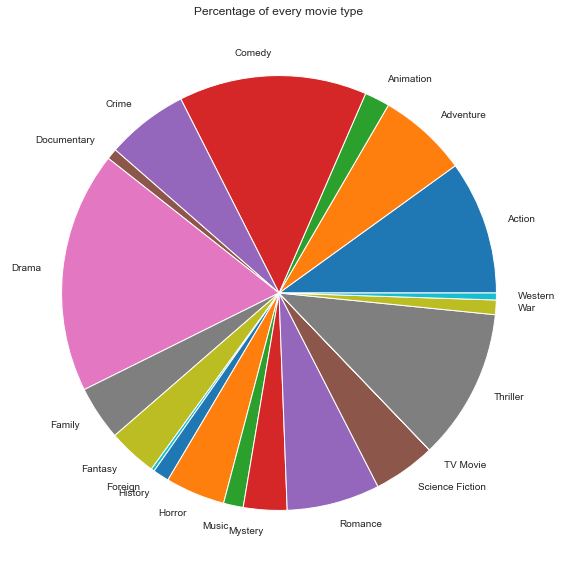

In [34]:
most_trend_genre=df.groupby('genres').count().popularity.plot(kind='pie',ylabel=(''),figsize=(10,10),title='Percentage of every movie type')

### So the (Dramatic) movies are the most trend through years.

### Which has the highest budget and revenue?!!!

In [35]:
def property_mean(df_property):
    # A function takes an input of a column label of (df)
    # this input must be between quots "---"
    # and gives a series of the mean of this label property 
    # for every genre.
    return df.groupby('genres')[df_property].mean()

In [36]:
property_mean('revenue')

genres
Action             1.376238e+08
Adventure          1.974209e+08
Animation          2.219578e+08
Comedy             8.037100e+07
Crime              7.411904e+07
Documentary        1.040564e+07
Drama              6.116330e+07
Family             1.738114e+08
Fantasy            1.913738e+08
Foreign            9.220853e+06
History            6.988195e+07
Horror             4.908902e+07
Music              6.267356e+07
Mystery            7.945422e+07
Romance            6.967464e+07
Science Fiction    1.468547e+08
TV Movie           4.200000e+07
Thriller           8.518643e+07
War                9.382043e+07
Western            7.252057e+07
Name: revenue, dtype: float64

In [37]:
print(property_mean('revenue')) 
property_mean('revenue').max()

genres
Action             1.376238e+08
Adventure          1.974209e+08
Animation          2.219578e+08
Comedy             8.037100e+07
Crime              7.411904e+07
Documentary        1.040564e+07
Drama              6.116330e+07
Family             1.738114e+08
Fantasy            1.913738e+08
Foreign            9.220853e+06
History            6.988195e+07
Horror             4.908902e+07
Music              6.267356e+07
Mystery            7.945422e+07
Romance            6.967464e+07
Science Fiction    1.468547e+08
TV Movie           4.200000e+07
Thriller           8.518643e+07
War                9.382043e+07
Western            7.252057e+07
Name: revenue, dtype: float64


221957753.1392405

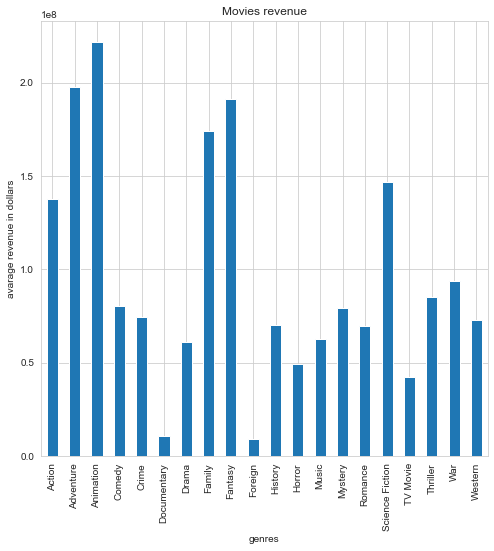

In [38]:
most_revenue=property_mean('revenue').plot(kind='bar',ylabel=('avarage revenue in dollars'),figsize=(8,8),title='Movies revenue')

In [39]:
print(property_mean('budget')) 
property_mean('budget').max()

genres
Action             4.858674e+07
Adventure          6.214027e+07
Animation          6.524992e+07
Comedy             2.538797e+07
Crime              2.782463e+07
Documentary        1.665237e+06
Drama              2.166593e+07
Family             5.176148e+07
Fantasy            6.074640e+07
Foreign            3.954797e+06
History            3.432008e+07
Horror             1.532300e+07
Music              1.885140e+07
Mystery            2.941932e+07
Romance            2.074418e+07
Science Fiction    4.955223e+07
TV Movie           5.000000e+06
Thriller           3.155386e+07
War                3.670398e+07
Western            4.226791e+07
Name: budget, dtype: float64


65249919.87341772

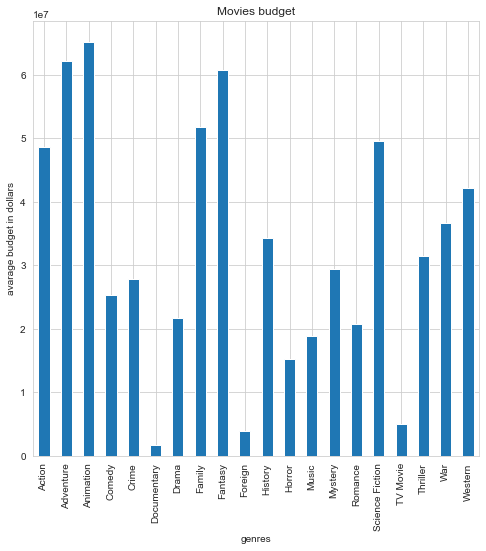

In [40]:
most_budget=property_mean('budget').plot(kind='bar',ylabel=('avarage budget in dollars'),figsize=(8,8),title='Movies budget')

### So we can see that the (Animation) movies have the highest budget and revenue.

## The mean popularity, and avarage vote of the movie types ?!!!

In [41]:
def property_mean(df_property):
    # A function than takes a column label of the df frame
    # and gives a series of the mean of this label property 
    # for every genre.
    return df.groupby('genres')[df_property].mean()

In [42]:
property_mean('popularity')

genres
Action             1.415015
Adventure          1.716589
Animation          1.546209
Comedy             0.893541
Crime              1.029229
Documentary        0.252099
Drama              0.884094
Family             1.299258
Fantasy            1.575284
Foreign            0.200967
History            0.891439
Horror             0.772167
Music              0.746048
Mystery            1.063759
Romance            0.836023
Science Fiction    1.721612
TV Movie           0.273628
Thriller           1.144096
War                1.142443
Western            0.988272
Name: popularity, dtype: float64

In [43]:
property_mean('popularity').max()

1.7216117359454854

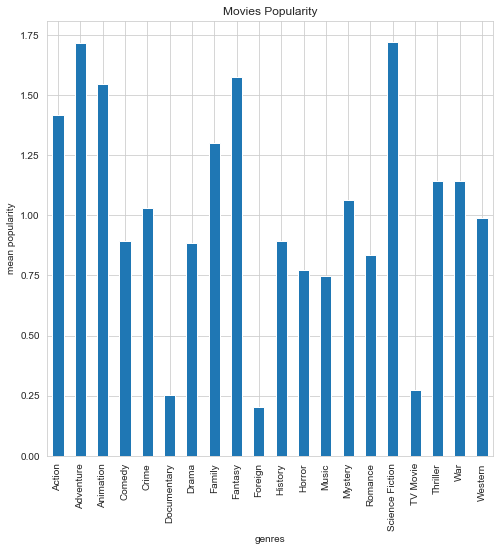

In [44]:
mean_popularty=property_mean('popularity').plot(kind='bar',ylabel=('mean popularity'),figsize=(8,8),title=('Movies Popularity'))

### (Science Fiction) and (Adventure) movies are the most popular movies.

In [45]:
property_mean('vote_average')

genres
Action             6.010785
Adventure          6.114116
Animation          6.355274
Comedy             6.002993
Crime              6.265762
Documentary        6.850000
Drama              6.354681
Family             6.104288
Fantasy            6.019089
Foreign            6.125806
History            6.534641
Horror             5.683957
Music              6.356452
Mystery            6.167805
Romance            6.155188
Science Fiction    6.001363
TV Movie           5.600000
Thriller           6.042065
War                6.561314
Western            6.400000
Name: vote_average, dtype: float64

In [46]:
property_mean('vote_average').max()

6.8500000000000005

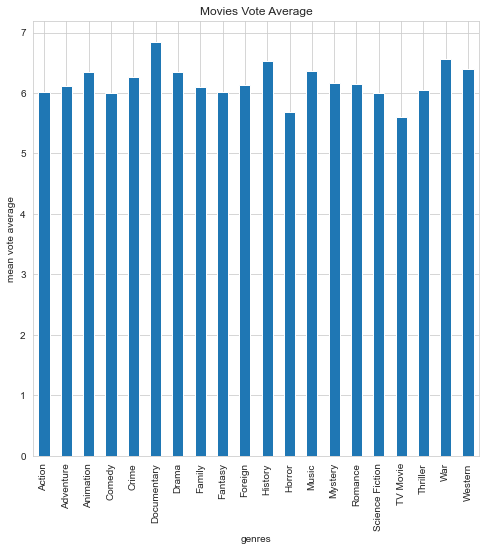

In [47]:
mean_vote_aver=property_mean('vote_average').plot(kind='bar',ylabel=('mean vote average'),figsize=(8,8),title=('Movies Vote Average'))

### Although the vote average is close, the (Documentary) movie type has the highest vote.

<a id='conclusions'></a>
# --------------------------------------------------------------------------------------------------------

# Analysis Conclusion:
#### - We have data of (tmdb-movies) -that has  information about 10,000 movies collected from The Movie Database (TMDb).
#### - We have wrangled the data to eliminate the unnecessary data and cleaned it from any NaN or missing values, and splitted collected columns.
#### - Then we supposed some quistions to expore the dataset, and we can summerize the answers in the following points:-
# 

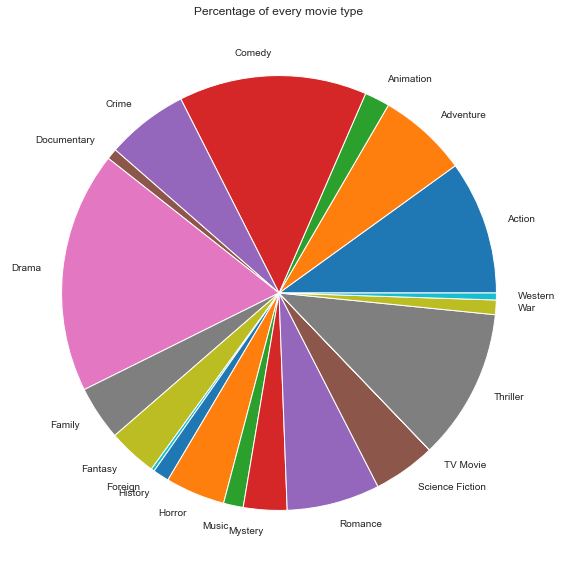

In [48]:
most_trend_genre=df.groupby('genres').count().popularity.plot(kind='pie',ylabel=(''),figsize=(10,10),title='Percentage of every movie type')

### * (Dramatic) movies are the most trend through years.
# 

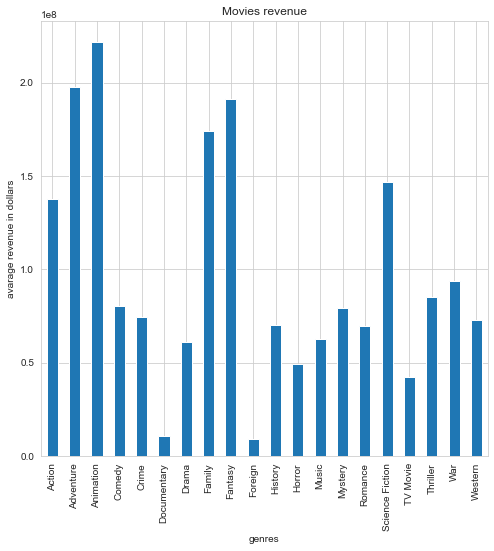

In [49]:
most_revenue=property_mean('revenue').plot(kind='bar',ylabel=('avarage revenue in dollars'),figsize=(8,8),title='Movies revenue')

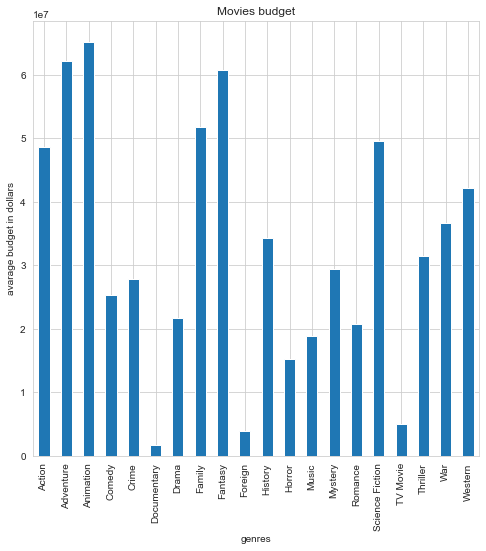

In [50]:
most_budget=property_mean('budget').plot(kind='bar',ylabel=('avarage budget in dollars'),figsize=(8,8),title='Movies budget')

### * (Animation) movies have the highest budget and revenue.
# 

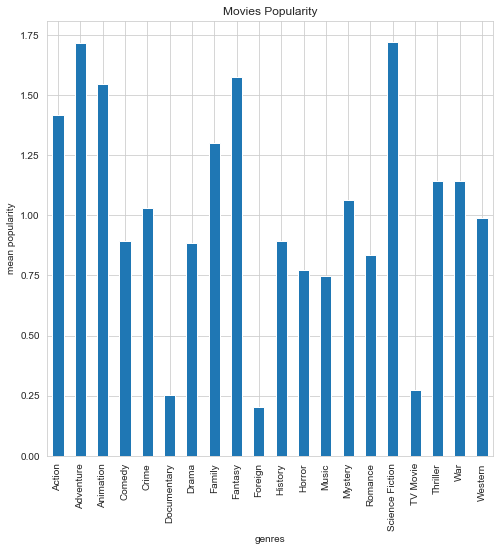

In [51]:
mean_popularty=property_mean('popularity').plot(kind='bar',ylabel=('mean popularity'),figsize=(8,8),title=('Movies Popularity'))

### * (Science Fiction) and (Adventure) movies are the most popular.
# 

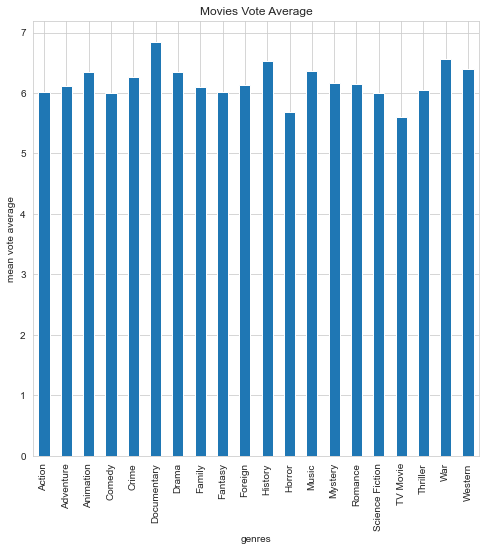

In [52]:
mean_vote_aver=property_mean('vote_average').plot(kind='bar',ylabel=('mean vote average'),figsize=(8,8),title=('Movies Vote Average'))

### *  (Documentary) movie type has the highest vote.
# -------------------------------------------------------------------------------------------------------

## At the end of the analysis, some notes should be mentioned:
### * I haven't the the knowlage that how this sample of dataset was taken from the whole population, so perhaps some findings aren't accurate due to this reason, but I did my best to get a better analysis.
### * Maybe the missing and NaN data we dropped before analysis, has affected the quality of exploration.
### * Surely my work has some limitations as this project was my first one and- as l mentioned- I don't have all about this dataset, so I hope the limitations are condoned, and I promise to practise more to get better.
# 
# Thank you!